In [74]:
import numpy as np
import chaospy as cp
import matplotlib.pyplot as plt

from sklearn.linear_model import LarsCV, LassoLarsCV


# Data Generation
np.random.seed(1234)

n = 50
num_rep = 20
X = np.linspace(0,10,n)
X = X.reshape(-1,1)
sigma = 0.5

f_true = lambda x: -np.cos(np.pi * x) + np.sin(4*np.pi * x)

Y = np.empty((n, num_rep))
for i in range(n):
    Y[i, :] = f_true(X[i]) + sigma * np.random.normal(loc=0, scale=sigma, size=num_rep)

X_train = X
Y_train = np.mean(Y, axis=1, keepdims=True)
V_train = np.var(Y, axis=1, keepdims=True)

In [75]:
distribution = cp.Uniform(0, 10)
expansion = cp.generate_expansion(20, distribution, normed=True)

In [76]:
lars = LarsCV(fit_intercept=False, max_iter=7)
pce, coeffs = cp.fit_regression(
    expansion, X_train.reshape(-1,), Y_train.reshape(-1,), model=lars, retall=True)
expansion_ = expansion[coeffs != 0]

# lars = LarsCV(fit_intercept=False, max_iter=5)
# lars.fit(expansion(samples).T, evaluations)
# expansion_ = expansion[lars.coef_ != 0]


In [77]:
expansion_, lars.coef_

(polynomial([0.0033315293785287263*q0**6-0.0999458813558618*q0**5+1.1357486517711568*q0**4-6.057326142779503*q0**3+15.143315356948762*q0**2-15.143315356948758*q0+3.6055512754639913,
             0.000530643694016993*q0**8-0.02122574776067972*q0**7+0.3466872134244354*q0**6-2.9716046864951613*q0**5+14.286560992765198*q0**4-38.0974959807072*q0**3+51.95113088278254*q0**2-29.686360504447155*q0+4.123105625617665,
             8.466583550972613e-05*q0**10-0.004233291775486307*q0**9+0.09023595626694496*q0**8-1.0694631853860144*q0**7+7.70642589469334*q0**6-34.67891652612003*q0**5+96.33032368366676*q0**4-157.27399785088448*q0**3+136.10249814018846*q0**2-50.408332644514225*q0+4.582575694955847,
             1.3520780000000001e-05*q0**12-0.0008112468000000001*q0**11+0.021339318*q0**10-0.323323*q0**9+3.1177575*q0**8-19.953648000000005*q0**7+85.76568000000002*q0**6-245.04480000000007*q0**5+450.45000000000005*q0**4-500.5000000000001*q0**3+300.2999999999999*q0**2-77.99999999999997*q0+5.000000000000009

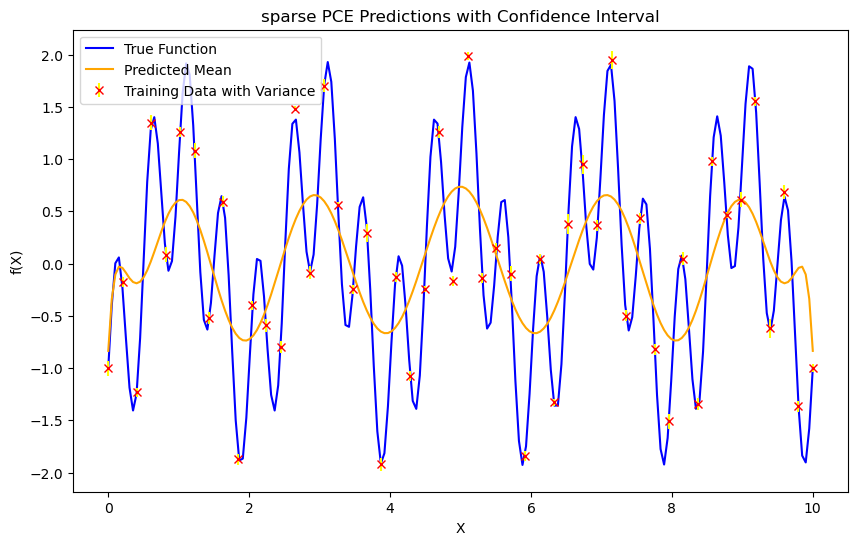

In [79]:
# First try to plot prediction of the mean, mse with the true function

# Generate predictions
X_test_plot = np.linspace(0, 10, 200).reshape(-1, 1)  # Test data
Y_pred_plot = pce(X_test_plot.reshape((-1,)))  # Predictions from the model
Y_pred_plot = Y_pred_plot.reshape(-1,1)

# True function values
Y_true_plot = f_true(X_test_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test_plot, Y_true_plot, label='True Function', color='blue')
plt.errorbar(X_train.flatten(), Y_train.flatten(), yerr=V_train.flatten(), fmt='x', color='red', ecolor='yellow', label='Training Data with Variance')
# plt.scatter(X_train, Y_train, color='red', label='Training Data')
plt.plot(X_test_plot, Y_pred_plot, label='Predicted Mean', color='orange')


plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('sparse PCE Predictions with Confidence Interval')
plt.legend()
plt.show()

